# Random Over-sampling with Smoothing

[Machine Learning with Imbalanced Data - Course](https://www.trainindata.com/p/machine-learning-with-imbalanced-data)

In order not to DUPLICATE the data, after extracting the samples at random, we multiply the value of the sample by a number that contemplates the dispersion of the data, to obtain artificial examples.

**For this functionality, make sure you have imbalanced-learn version 0.8.0 or bigger installed.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from imblearn.over_sampling import RandomOverSampler

## Create data

[make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)

We will create 2 classes, one majority one minority, clearly separated to facilitate the demonstration.

In [2]:
# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# create an imbalancced Xset
# (make blobs creates same number of obs per class
# we need to downsample manually)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# display size
X.shape, y.shape

((1000, 2), (1000,))

In [3]:
X.head()

,VarA,VarB
0,-0.573025,-0.169751
2,-1.479621,0.502641
3,-1.882951,1.914108
4,-1.335157,0.630461
7,0.252389,-0.754093


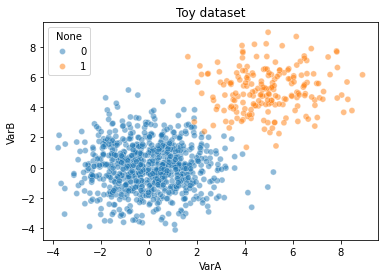

In [4]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

## Random Over-sampling with smoothing

[RandomOverSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html)


We'll try different shrinking parameters to evaluate the effect.

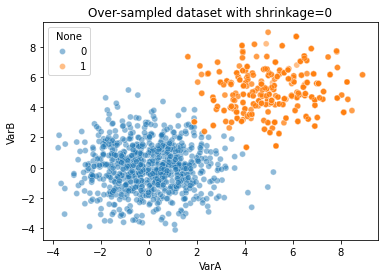

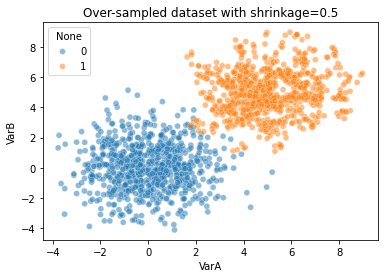

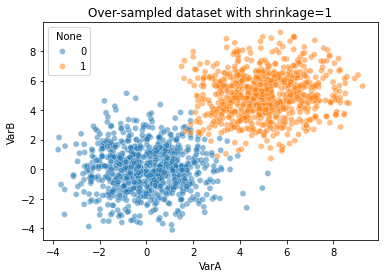

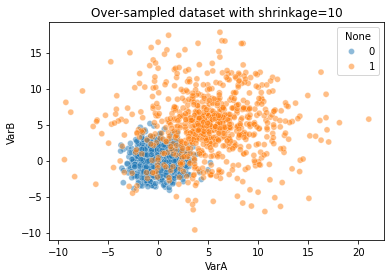

In [5]:
for shrink in [0, 0.5, 1, 10]:

    ros = RandomOverSampler(
        sampling_strategy='auto', # samples only the minority class
        random_state=0,  # for reproducibility
        shrinkage = shrink,
    )  

    X_res, y_res = ros.fit_resample(X, y)
    
    # plot of resampled data

    sns.scatterplot(
        data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
    )

    plt.title('Over-sampled dataset with shrinkage={}'.format(shrink))
    plt.show()

The bigger the shrinkage the more far away from the center of the distribution the samples are created.

# Multiclass

## Create data

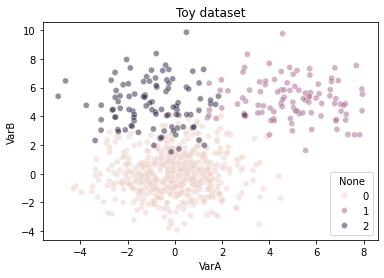

In [6]:
# Create some toy data

# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5), [-1, 5]]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std,
)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# create an imbalancced Xset
# (make blobs creates same number of obs per class
# we need to downsample manually)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(100, random_state=42),
    X[y == 2].sample(100, random_state=42)
], axis=0)

y = y.loc[X.index]

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

In [7]:
y.value_counts()

0    534
1    100
2    100
Name: count, dtype: int64

## Oversampling

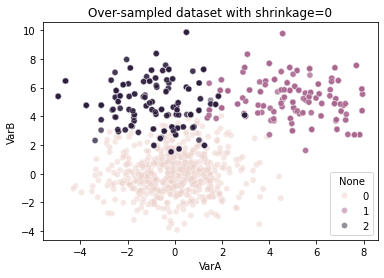

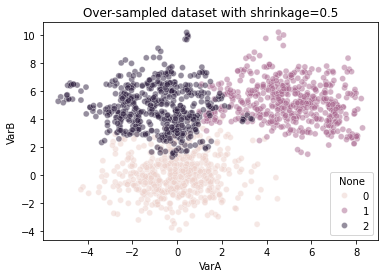

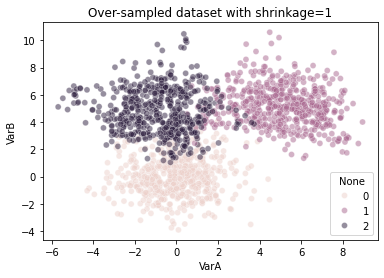

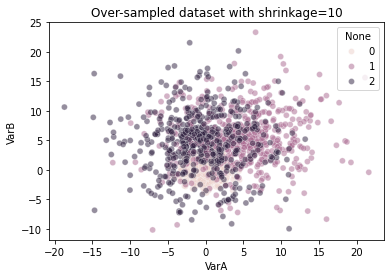

In [8]:
for shrink in [0, 0.5, 1, 10]:

    ros = RandomOverSampler(
        sampling_strategy='not majority', # samples all but majority class
        random_state=0,  # for reproducibility
        shrinkage = shrink,
    )  

    X_res, y_res = ros.fit_resample(X, y)

    # plot of resampled data

    sns.scatterplot(
        data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
    )

    plt.title('Over-sampled dataset with shrinkage={}'.format(shrink))
    plt.show()

In [9]:
y_res.value_counts()

0    534
1    534
2    534
Name: count, dtype: int64

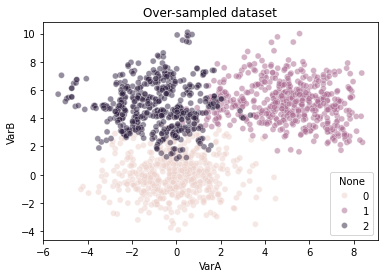

In [10]:
# we can also specify different shrinkage for different classes

ros = RandomOverSampler(
    sampling_strategy={1:500, 2:500}, # we specify what to oversample
    random_state=0,  # for reproducibility
    shrinkage = {1:1, 2:0.5}
)  

X_res, y_res = ros.fit_resample(X, y)

# plot of resampled data

sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

plt.title('Over-sampled dataset')
plt.show()

In [11]:
y_res.value_counts()

0    534
1    500
2    500
Name: count, dtype: int64